# <div style="text-align:center; padding:25px;color:#232f3e;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:tomato;overflow:hidden"><b>Skin Diseases Text Classification</b></div>

![](https://img.freepik.com/free-vector/digram-showing-anatomy-human-skin-pink-background_1308-43323.jpg?w=900&t=st=1706434979~exp=1706435579~hmac=63263b023efd963cff7e9925be4fb088d7b53129097a208d00019218159c3ad5)

Image Source: Freepik
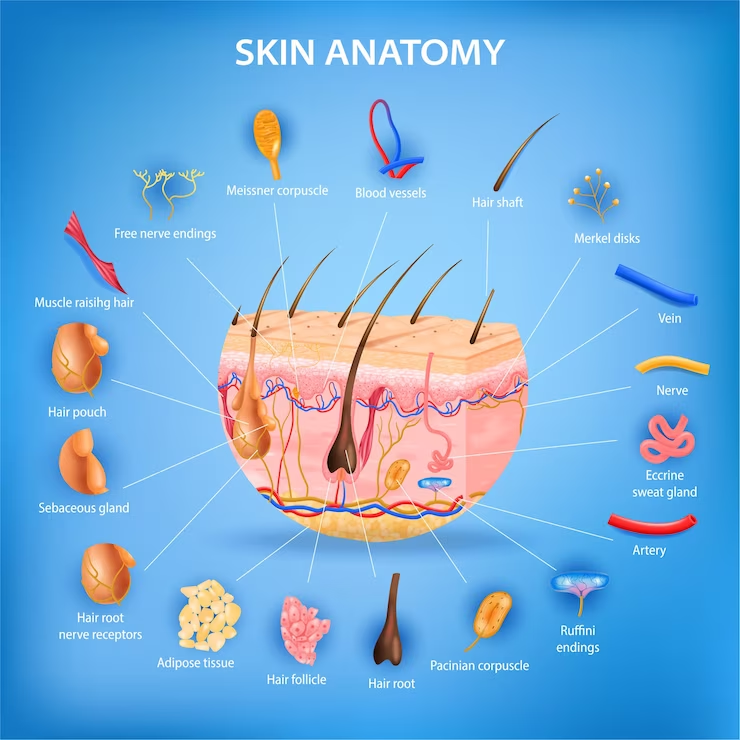

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Import Essential Libraries</b></div>

In [ ]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Load the Dataset</b></div>

In [ ]:
# load the dataset
data = pd.read_csv('/kaggle/input/skin-disease-text-classification/Skin_text_classifier.csv')

# check the dimension of the dataset
num_row, num_col = data.shape
print('The dataset contains {} rows and {} columns.'.format(num_row, num_col))

# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)\

# view first 5 rows of the dataset
data.head()

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Attributes Description</b></div>

1. Disease name - disease name
2. Text - description of disease symptoms

In [ ]:
# top level overview of the dataset
data.info()

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Visualization</b></div>

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 1 | Proportion of Diseases in the Dataset</b></div>

In [ ]:
# proportion and number of diseases in the dataset
import plotly.express as px

# plot a treemap chart using plotly express
fig = px.treemap(data, path=[px.Constant('all'), 'Disease name'], title='Proportion of Diseases')
fig.update_traces(root_color='lightgrey')

# set the plot layout
fig.update_layout(width=900, height=700, margin = dict(t=50, l=25, r=25, b=25))

# display the plot
fig.show()

In [ ]:
# install spacy into the kernel
!pip install spacy

# download a spacy model
!python -m spacy download en_core_web_lg

In [ ]:
# import spacy 
import spacy

# create a processing pipeline
nlp = spacy.load('en_core_web_lg')

# check the component in the processing pipeline
print('Components in the processing pipeline: ', nlp.pipe_names)

In [ ]:
# define a function to normalize the text 
def normalize(text):
    # process the text using spacy
    doc = nlp(text)
    # extract the lemmatized tokens without punctuation and stop words
    normalized_text = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    # joined the lemmatized tokens into a string
    text_string = ' '.join(normalized_text)
    return text_string

In [ ]:
# normalize the text data --- the description of disease symptoms
data['normalized_text'] = data['Text'].apply(normalize)

In [ ]:
# define a function take in a dataframe, column name (text) in the dataframe to generate wod clouds
from wordcloud import WordCloud

def generate_wordcloud(df, textCol):
    # join the words in the text column to form a single string
    text_combined = ' '.join(df[textCol])
    
    # create a WordCloud object
    wordcloud = WordCloud(width=800, height=500,
                          background_color='white',colormap='plasma').generate(text_combined)

    # display the WordCloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='nearest')
    plt.axis('off')
    plt.show()

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 2 | Keywords for Vitiligo Description</b></div>

In [ ]:
vitiligo = data[data['Disease name']=='Vitiligo']
generate_wordcloud(vitiligo, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 3 | Keywords for Scabies Description</b></div>

In [ ]:
scabies = data[data['Disease name']=='Scabies']
generate_wordcloud(scabies, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 4 | Keywords for Hives (Urticaria) Description</b></div>

In [ ]:
hives = data[data['Disease name']=='Hives (Urticaria)']
generate_wordcloud(hives, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 5 | Keywords for Folliculitis Description</b></div>

In [ ]:
folliculitis = data[data['Disease name']=='Folliculitis']
generate_wordcloud(folliculitis, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 6 | Keywords for Eczema Description</b></div>

In [ ]:
eczema = data[data['Disease name']=='Eczema']
generate_wordcloud(eczema, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 7 | Keywords for Ringworm (Tinea Corporis) Description</b></div>

In [ ]:
ringworm = data[data['Disease name']=='Ringworm (Tinea Corporis)']
generate_wordcloud(ringworm, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 8 | Keywords for Athlete's Foot (Tinea Pedis) Description</b></div>

In [ ]:
atheleteFoot = data[data['Disease name']=='Athlete\'s Foot (Tinea Pedis)']
generate_wordcloud(atheleteFoot, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 9 | Keywords for Rosacea Description</b></div>

In [ ]:
rosacea = data[data['Disease name']=='Rosacea']
generate_wordcloud(rosacea, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 10 | Keywords for Psoriasis Description</b></div>

In [ ]:
psoriasis = data[data['Disease name']=='Psoriasis']
generate_wordcloud(psoriasis, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 11 | Keywords for Shingles (Herpes Zoster) Description</b></div>

In [ ]:
shingles = data[data['Disease name']=='Shingles (Herpes Zoster)']
generate_wordcloud(shingles, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 12 | Keywords for Impetigo Description</b></div>

In [ ]:
impetigo = data[data['Disease name']=='Impetigo']
generate_wordcloud(impetigo, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 13 | Keywords for Contact Dermatitis Description</b></div>

In [ ]:
contactDermatitis = data[data['Disease name']=='Contact Dermatitis']
generate_wordcloud(contactDermatitis, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Plot 14 | Keywords for Acne Description</b></div>

In [ ]:
acne = data[data['Disease name']=='Acne']
generate_wordcloud(acne, 'Text')

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Predictive Analysis</b></div>

In [ ]:
# convert the normalized text into text vector
# insert a new column 'text_vector' into the dataset
data['text_vector'] = data['normalized_text'].apply(lambda text: nlp(text).vector)

In [ ]:
# split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, stratify=data['Disease name'], random_state=122)

# check the dimension of the training and test dataset
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

In [ ]:
# segregate the feature and target from the train and test dataset
Xtrain = train['text_vector']
ytrain = train['Disease name']

Xtest = test['text_vector']
ytest = test['Disease name']

In [ ]:
# label encode the target 'Disease name'
from sklearn.preprocessing import LabelEncoder

# initialize the LabelEncoder class
encoder = LabelEncoder()

# encode the target vector for both train and test datasets
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)

In [ ]:
# convert the feature vector into 2D numpy array
Xtrain_array = np.array(Xtrain)
Xtest_array = np.array(Xtest)

Xtrain_2d = np.stack(Xtrain_array)
Xtest_2d = np.stack(Xtest_array)

In [ ]:
# normalized the feature array
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_2d)
Xtest_scaled = scaler.transform(Xtest_2d)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# initialize a MultinomialNB class
clf = MultinomialNB()

# train a Naive Bayes model with training data
mNB = clf.fit(Xtrain_scaled, ytrain_encoded)

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Model Performance</b></div>

In [ ]:
from sklearn.metrics import confusion_matrix

ypred = mNB.predict(Xtest_scaled)
confusion_matrix = confusion_matrix(ytest_encoded, ypred, normalize='true')

# visualize the confusion matrix in heatmap
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix, annot=True, cmap='BuPu', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

In [ ]:
# print the classification report
from sklearn.metrics import classification_report

report = classification_report(ytest_encoded, ypred, target_names=encoder.classes_, zero_division=0)
print(report)

# <div style="text-align:left; padding:15px;color:#232f3e;margin:0;font-size:25px;font-family:Serif;display:fill;border-radius:5px;background-color:wheat;overflow:hidden"><b>Future Direction</b></div>

1. Analyze misclassifications to understand common patterns or features causing confusion between classes.
2. Experiment with different word embeddings, feature engineering techniques, or other NLP models to see if they lead to better performance.